# Importing Packages

In [1]:
# Importing the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Load the Data

In [2]:
# Loading the data
df = pd.read_csv("D:\Wine Quality Prediction\Wine-Quality-Dataset.csv")
# Checking how the data is distributed
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Information about the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Visualize through the plots

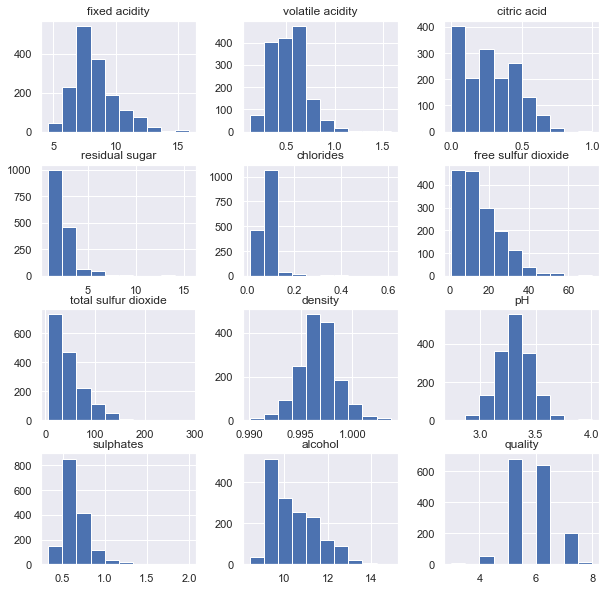

In [4]:
sns.set()
df.hist(figsize=(10,10))
plt.show()

<AxesSubplot:title={'center':'Correlation of Features'}>

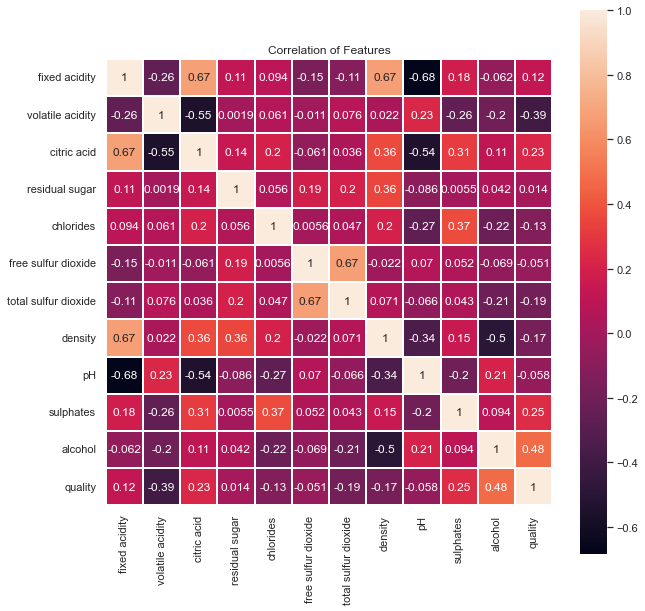

In [5]:
plt.figure(figsize=(10,10))
plt.title('Correlation of Features')
sns.heatmap(df.astype(float).corr(), linewidths=0.1, vmax=1.0, linecolor='white', square=True, annot=True)

# Evaluating Algorithms

# Preprocessing data for performing Machine Learning algorithms

In [6]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality

In [7]:
y = df['quality']
x = df.drop('quality',axis = 1)

In [8]:
bins = (2, 6.5, 8)
groups = ['bad','good']
y = pd.cut(y, bins=bins, labels=groups)

In [9]:
label_encoder = LabelEncoder()

In [10]:
y = label_encoder.fit_transform(y)

<AxesSubplot:ylabel='count'>

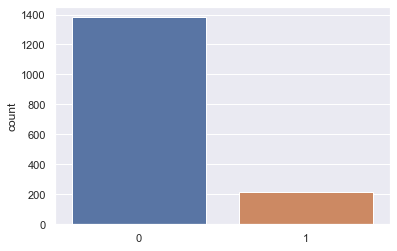

In [11]:
sns.countplot(y)

In [12]:
seed = 7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed, shuffle=True)

In [13]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Training and evaluation of Random Forest Classifier with Cross Validation

In [14]:
#rf = RandomForestClassifier(random_state=seed)
#rf

In [15]:
seed = 7

In [16]:
models = []
models.append(('RF',RandomForestClassifier()))
models.append(('SGDC',SGDClassifier()))
models.append(('SVM',SVC()))
# Evaluating each models in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.910876 (0.017847)
SGDC: 0.835796 (0.041981)
SVM: 0.879601 (0.021833)


It can be concluded that Random Forests has the highest score amongst the rest of the models. Hence, Random Forests will be selected as the final model.

# Final Model

In [17]:
rf = RandomForestClassifier(random_state=seed)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=7)

In [18]:
predicted_values = rf.predict(x_test)

# Accuracy, Confusion Matrix and Classification Report

In [19]:
print(accuracy_score(y_test,predicted_values))
print(confusion_matrix(y_test,predicted_values))
print(classification_report(y_test,predicted_values))

0.89375
[[269  10]
 [ 24  17]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       279
           1       0.63      0.41      0.50        41

    accuracy                           0.89       320
   macro avg       0.77      0.69      0.72       320
weighted avg       0.88      0.89      0.88       320

